## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2018-07-08 01:00:31--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.84.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.84.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  51.1MB/s    in 7.8s    

2018-07-08 01:00:39 (41.2 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10

  inflating: /data/test/Angel_Lockward_50.jpg  
  inflating: /data/test/Angel_Lockward_51.jpg  
  inflating: /data/test/Angela_Bassett_20.jpg  
  inflating: /data/test/Angela_Bassett_21.jpg  
  inflating: /data/test/Angela_Bassett_30.jpg  
  inflating: /data/test/Angela_Bassett_31.jpg  
  inflating: /data/test/Angela_Bassett_40.jpg  
  inflating: /data/test/Angela_Bassett_41.jpg  
  inflating: /data/test/Angelo_Reyes_20.jpg  
  inflating: /data/test/Angelo_Reyes_21.jpg  
  inflating: /data/test/Angelo_Reyes_30.jpg  
  inflating: /data/test/Angelo_Reyes_31.jpg  
  inflating: /data/test/Angelo_Reyes_50.jpg  
  inflating: /data/test/Angelo_Reyes_51.jpg  
  inflating: /data/test/Baburam_Bhattari_00.jpg  
  inflating: /data/test/Baburam_Bhattari_01.jpg  
  inflating: /data/test/Baburam_Bhattari_20.jpg  
  inflating: /data/test/Baburam_Bhattari_21.jpg  
  inflating: /data/test/Baburam_Bhattari_30.jpg  
  inflating: /data/test/Baburam_Bhattari_31.jpg  
  inflating: /data/test/Barbara_Bodine_0

  inflating: /data/test/Charlotte_Casiraghi_21.jpg  
  inflating: /data/test/Charlotte_Rampling_00.jpg  
  inflating: /data/test/Charlotte_Rampling_01.jpg  
  inflating: /data/test/Charlotte_Rampling_30.jpg  
  inflating: /data/test/Charlotte_Rampling_31.jpg  
  inflating: /data/test/Charlotte_Rampling_40.jpg  
  inflating: /data/test/Charlotte_Rampling_41.jpg  
  inflating: /data/test/Charlotte_Rampling_50.jpg  
  inflating: /data/test/Charlotte_Rampling_51.jpg  
  inflating: /data/test/Cherie_Blair_00.jpg  
  inflating: /data/test/Cherie_Blair_01.jpg  
  inflating: /data/test/Cherie_Blair_20.jpg  
  inflating: /data/test/Cherie_Blair_21.jpg  
  inflating: /data/test/Cherie_Blair_30.jpg  
  inflating: /data/test/Cherie_Blair_31.jpg  
  inflating: /data/test/Cherie_Blair_40.jpg  
  inflating: /data/test/Cherie_Blair_41.jpg  
  inflating: /data/test/Chita_Rivera_00.jpg  
  inflating: /data/test/Chita_Rivera_01.jpg  
  inflating: /data/test/Chita_Rivera_10.jpg  
  inflating: /data/test/C

  inflating: /data/test/Daniel_Rouse_30.jpg  
  inflating: /data/test/Daniel_Rouse_31.jpg  
  inflating: /data/test/Daniell_Sunjata_10.jpg  
  inflating: /data/test/Daniell_Sunjata_11.jpg  
  inflating: /data/test/Daniell_Sunjata_20.jpg  
  inflating: /data/test/Daniell_Sunjata_21.jpg  
  inflating: /data/test/Daniell_Sunjata_40.jpg  
  inflating: /data/test/Daniell_Sunjata_41.jpg  
  inflating: /data/test/Danny_Glover_10.jpg  
  inflating: /data/test/Danny_Glover_11.jpg  
  inflating: /data/test/Danny_Glover_30.jpg  
  inflating: /data/test/Danny_Glover_31.jpg  
  inflating: /data/test/Danny_Glover_50.jpg  
  inflating: /data/test/Danny_Glover_51.jpg  
  inflating: /data/test/Darrell_Issa_00.jpg  
  inflating: /data/test/Darrell_Issa_01.jpg  
  inflating: /data/test/Darrell_Issa_20.jpg  
  inflating: /data/test/Darrell_Issa_21.jpg  
  inflating: /data/test/Darrell_Issa_30.jpg  
  inflating: /data/test/Darrell_Issa_31.jpg  
  inflating: /data/test/Darrell_Issa_40.jpg  
  inflating: /da

  inflating: /data/test/Ernesto_Zedillo_40.jpg  
  inflating: /data/test/Ernesto_Zedillo_41.jpg  
  inflating: /data/test/Ernie_Grunfeld_20.jpg  
  inflating: /data/test/Ernie_Grunfeld_21.jpg  
  inflating: /data/test/Ernie_Grunfeld_30.jpg  
  inflating: /data/test/Ernie_Grunfeld_31.jpg  
  inflating: /data/test/Ernie_Grunfeld_40.jpg  
  inflating: /data/test/Ernie_Grunfeld_41.jpg  
  inflating: /data/test/Ernie_Grunfeld_50.jpg  
  inflating: /data/test/Ernie_Grunfeld_51.jpg  
  inflating: /data/test/Estelle_Morris_10.jpg  
  inflating: /data/test/Estelle_Morris_11.jpg  
  inflating: /data/test/Estelle_Morris_20.jpg  
  inflating: /data/test/Estelle_Morris_21.jpg  
  inflating: /data/test/Estelle_Morris_30.jpg  
  inflating: /data/test/Estelle_Morris_31.jpg  
  inflating: /data/test/Ethan_Hawke_00.jpg  
  inflating: /data/test/Ethan_Hawke_01.jpg  
  inflating: /data/test/Ethan_Hawke_10.jpg  
  inflating: /data/test/Ethan_Hawke_11.jpg  
  inflating: /data/test/Ethan_Hawke_30.jpg  
  inf

  inflating: /data/test/Jack_Welch_51.jpg  
  inflating: /data/test/Jackie_Sherrill_20.jpg  
  inflating: /data/test/Jackie_Sherrill_21.jpg  
  inflating: /data/test/Jackie_Sherrill_40.jpg  
  inflating: /data/test/Jackie_Sherrill_41.jpg  
  inflating: /data/test/Jackie_Sherrill_50.jpg  
  inflating: /data/test/Jackie_Sherrill_51.jpg  
  inflating: /data/test/Jacqueline_Gold_00.jpg  
  inflating: /data/test/Jacqueline_Gold_01.jpg  
  inflating: /data/test/Jacqueline_Gold_20.jpg  
  inflating: /data/test/Jacqueline_Gold_21.jpg  
  inflating: /data/test/Jacqueline_Gold_30.jpg  
  inflating: /data/test/Jacqueline_Gold_31.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_00.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_01.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_20.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_21.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_30.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_31.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_50.jpg  
  inflating

  inflating: /data/test/Kristin_Scott_11.jpg  
  inflating: /data/test/Kristin_Scott_40.jpg  
  inflating: /data/test/Kristin_Scott_41.jpg  
  inflating: /data/test/Kristin_Scott_50.jpg  
  inflating: /data/test/Kristin_Scott_51.jpg  
  inflating: /data/test/Kristy_Curry_00.jpg  
  inflating: /data/test/Kristy_Curry_01.jpg  
  inflating: /data/test/Kristy_Curry_20.jpg  
  inflating: /data/test/Kristy_Curry_21.jpg  
  inflating: /data/test/Kristy_Curry_30.jpg  
  inflating: /data/test/Kristy_Curry_31.jpg  
  inflating: /data/test/Kurt_Warner_00.jpg  
  inflating: /data/test/Kurt_Warner_01.jpg  
  inflating: /data/test/Kurt_Warner_10.jpg  
  inflating: /data/test/Kurt_Warner_11.jpg  
  inflating: /data/test/Kurt_Warner_40.jpg  
  inflating: /data/test/Kurt_Warner_41.jpg  
  inflating: /data/test/Kweisi_Mfume_00.jpg  
  inflating: /data/test/Kweisi_Mfume_01.jpg  
  inflating: /data/test/Kweisi_Mfume_10.jpg  
  inflating: /data/test/Kweisi_Mfume_11.jpg  
  inflating: /data/test/Kweisi_Mfum

  inflating: /data/test/Lucia_Kenny_Anthony_10.jpg  
  inflating: /data/test/Lucia_Kenny_Anthony_11.jpg  
  inflating: /data/test/Lucia_Kenny_Anthony_40.jpg  
  inflating: /data/test/Lucia_Kenny_Anthony_41.jpg  
  inflating: /data/test/Lucia_Kenny_Anthony_50.jpg  
  inflating: /data/test/Lucia_Kenny_Anthony_51.jpg  
  inflating: /data/test/Lucio_Stanca_00.jpg  
  inflating: /data/test/Lucio_Stanca_01.jpg  
  inflating: /data/test/Lucio_Stanca_20.jpg  
  inflating: /data/test/Lucio_Stanca_21.jpg  
  inflating: /data/test/Lucio_Stanca_30.jpg  
  inflating: /data/test/Lucio_Stanca_31.jpg  
  inflating: /data/test/Lucio_Stanca_40.jpg  
  inflating: /data/test/Lucio_Stanca_41.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_00.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_01.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_10.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_11.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_50.jpg  
  in

  inflating: /data/test/Nancy_Kerrigan_31.jpg  
  inflating: /data/test/Nancy_Kerrigan_40.jpg  
  inflating: /data/test/Nancy_Kerrigan_41.jpg  
  inflating: /data/test/Nancy_Reagan_00.jpg  
  inflating: /data/test/Nancy_Reagan_01.jpg  
  inflating: /data/test/Nancy_Reagan_10.jpg  
  inflating: /data/test/Nancy_Reagan_11.jpg  
  inflating: /data/test/Nancy_Reagan_30.jpg  
  inflating: /data/test/Nancy_Reagan_31.jpg  
  inflating: /data/test/Nancy_Reagan_40.jpg  
  inflating: /data/test/Nancy_Reagan_41.jpg  
  inflating: /data/test/Nanni_Moretti_10.jpg  
  inflating: /data/test/Nanni_Moretti_11.jpg  
  inflating: /data/test/Nanni_Moretti_20.jpg  
  inflating: /data/test/Nanni_Moretti_21.jpg  
  inflating: /data/test/Nanni_Moretti_40.jpg  
  inflating: /data/test/Nanni_Moretti_41.jpg  
  inflating: /data/test/Natalia_Vodonova_00.jpg  
  inflating: /data/test/Natalia_Vodonova_01.jpg  
  inflating: /data/test/Natalia_Vodonova_10.jpg  
  inflating: /data/test/Natalia_Vodonova_11.jpg  
  infl

  inflating: /data/test/Priyanka_Chopra_40.jpg  
  inflating: /data/test/Priyanka_Chopra_41.jpg  
  inflating: /data/test/Priyanka_Chopra_50.jpg  
  inflating: /data/test/Priyanka_Chopra_51.jpg  
  inflating: /data/test/Queen_Noor_10.jpg  
  inflating: /data/test/Queen_Noor_11.jpg  
  inflating: /data/test/Queen_Noor_30.jpg  
  inflating: /data/test/Queen_Noor_31.jpg  
  inflating: /data/test/Queen_Noor_50.jpg  
  inflating: /data/test/Queen_Noor_51.jpg  
  inflating: /data/test/Queen_Rania_10.jpg  
  inflating: /data/test/Queen_Rania_11.jpg  
  inflating: /data/test/Queen_Rania_30.jpg  
  inflating: /data/test/Queen_Rania_31.jpg  
  inflating: /data/test/Queen_Rania_50.jpg  
  inflating: /data/test/Queen_Rania_51.jpg  
  inflating: /data/test/Rachel_Hunter_30.jpg  
  inflating: /data/test/Rachel_Hunter_31.jpg  
  inflating: /data/test/Rachel_Hunter_40.jpg  
  inflating: /data/test/Rachel_Hunter_41.jpg  
  inflating: /data/test/Rachel_Hunter_50.jpg  
  inflating: /data/test/Rachel_Hunt

  inflating: /data/test/Ted_Turner_30.jpg  
  inflating: /data/test/Ted_Turner_31.jpg  
  inflating: /data/test/Ted_Turner_50.jpg  
  inflating: /data/test/Ted_Turner_51.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_00.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_01.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_10.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_11.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_20.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_21.jpg  
  inflating: /data/test/Terje_Roed-Larsen_00.jpg  
  inflating: /data/test/Terje_Roed-Larsen_01.jpg  
  inflating: /data/test/Terje_Roed-Larsen_20.jpg  
  inflating: /data/test/Terje_Roed-Larsen_21.jpg  
  inflating: /data/test/Terje_Roed-Larsen_30.jpg  
  inflating: /data/test/Terje_Roed-Larsen_31.jpg  
  inflating: /data/test/Tessa_Jowell_00.jpg  
  inflating: /data/test/Tessa_Jowell_01.jpg  
  inflating: /data/test/Tessa_Jowell_20.jpg  
  inflating: /data/test/Tessa_Jowell_21.jpg  
  inflating: /data/tes

  inflating: /data/test/Zhang_Ziyi_10.jpg  
  inflating: /data/test/Zhang_Ziyi_11.jpg  
  inflating: /data/test/Zhang_Ziyi_20.jpg  
  inflating: /data/test/Zhang_Ziyi_21.jpg  
  inflating: /data/test/Zhang_Ziyi_40.jpg  
  inflating: /data/test/Zhang_Ziyi_41.jpg  
  inflating: /data/test/Zhong_Nanshan_00.jpg  
  inflating: /data/test/Zhong_Nanshan_01.jpg  
  inflating: /data/test/Zhong_Nanshan_10.jpg  
  inflating: /data/test/Zhong_Nanshan_11.jpg  
  inflating: /data/test/Zhong_Nanshan_50.jpg  
  inflating: /data/test/Zhong_Nanshan_51.jpg  
  inflating: /data/test_frames_keypoints.csv  
   creating: /data/training/
  inflating: /data/training/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_02.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_12.jpg  
  inflating: /data/training/Abdel_Az

  inflating: /data/training/Ali_Abbas_50.jpg  
  inflating: /data/training/Ali_Abbas_51.jpg  
  inflating: /data/training/Ali_Abbas_52.jpg  
  inflating: /data/training/Alicia_Silverstone_00.jpg  
  inflating: /data/training/Alicia_Silverstone_01.jpg  
  inflating: /data/training/Alicia_Silverstone_02.jpg  
  inflating: /data/training/Alicia_Silverstone_10.jpg  
  inflating: /data/training/Alicia_Silverstone_11.jpg  
  inflating: /data/training/Alicia_Silverstone_12.jpg  
  inflating: /data/training/Alicia_Silverstone_20.jpg  
  inflating: /data/training/Alicia_Silverstone_21.jpg  
  inflating: /data/training/Alicia_Silverstone_22.jpg  
  inflating: /data/training/Alicia_Silverstone_50.jpg  
  inflating: /data/training/Alicia_Silverstone_51.jpg  
  inflating: /data/training/Alicia_Silverstone_52.jpg  
  inflating: /data/training/Alma_Powell_00.jpg  
  inflating: /data/training/Alma_Powell_01.jpg  
  inflating: /data/training/Alma_Powell_02.jpg  
  inflating: /data/training/Alma_Powell_

  inflating: /data/training/Beyonce_Knowles_30.jpg  
  inflating: /data/training/Beyonce_Knowles_31.jpg  
  inflating: /data/training/Beyonce_Knowles_32.jpg  
  inflating: /data/training/Beyonce_Knowles_50.jpg  
  inflating: /data/training/Beyonce_Knowles_51.jpg  
  inflating: /data/training/Beyonce_Knowles_52.jpg  
  inflating: /data/training/Bianca_Jagger_20.jpg  
  inflating: /data/training/Bianca_Jagger_21.jpg  
  inflating: /data/training/Bianca_Jagger_22.jpg  
  inflating: /data/training/Bianca_Jagger_30.jpg  
  inflating: /data/training/Bianca_Jagger_31.jpg  
  inflating: /data/training/Bianca_Jagger_32.jpg  
  inflating: /data/training/Bianca_Jagger_40.jpg  
  inflating: /data/training/Bianca_Jagger_41.jpg  
  inflating: /data/training/Bianca_Jagger_42.jpg  
  inflating: /data/training/Biljana_Plavsic_00.jpg  
  inflating: /data/training/Biljana_Plavsic_01.jpg  
  inflating: /data/training/Biljana_Plavsic_02.jpg  
  inflating: /data/training/Biljana_Plavsic_10.jpg  
  inflating

  inflating: /data/training/Charlie_Coles_20.jpg  
  inflating: /data/training/Charlie_Coles_21.jpg  
  inflating: /data/training/Charlie_Coles_22.jpg  
  inflating: /data/training/Charlize_Theron_10.jpg  
  inflating: /data/training/Charlize_Theron_11.jpg  
  inflating: /data/training/Charlize_Theron_12.jpg  
  inflating: /data/training/Charlize_Theron_30.jpg  
  inflating: /data/training/Charlize_Theron_31.jpg  
  inflating: /data/training/Charlize_Theron_32.jpg  
  inflating: /data/training/Charlize_Theron_50.jpg  
  inflating: /data/training/Charlize_Theron_51.jpg  
  inflating: /data/training/Charlize_Theron_52.jpg  
  inflating: /data/training/Charlotte_Casiraghi_00.jpg  
  inflating: /data/training/Charlotte_Casiraghi_01.jpg  
  inflating: /data/training/Charlotte_Casiraghi_02.jpg  
  inflating: /data/training/Charlotte_Casiraghi_10.jpg  
  inflating: /data/training/Charlotte_Casiraghi_11.jpg  
  inflating: /data/training/Charlotte_Casiraghi_12.jpg  
  inflating: /data/training/

  inflating: /data/training/Clint_Howard_00.jpg  
  inflating: /data/training/Clint_Howard_01.jpg  
  inflating: /data/training/Clint_Howard_02.jpg  
  inflating: /data/training/Clint_Howard_10.jpg  
  inflating: /data/training/Clint_Howard_11.jpg  
  inflating: /data/training/Clint_Howard_12.jpg  
  inflating: /data/training/Clint_Howard_20.jpg  
  inflating: /data/training/Clint_Howard_21.jpg  
  inflating: /data/training/Clint_Howard_22.jpg  
  inflating: /data/training/Clint_Howard_30.jpg  
  inflating: /data/training/Clint_Howard_31.jpg  
  inflating: /data/training/Clint_Howard_32.jpg  
  inflating: /data/training/Clive_Lloyd_30.jpg  
  inflating: /data/training/Clive_Lloyd_31.jpg  
  inflating: /data/training/Clive_Lloyd_32.jpg  
  inflating: /data/training/Clive_Lloyd_40.jpg  
  inflating: /data/training/Clive_Lloyd_41.jpg  
  inflating: /data/training/Clive_Lloyd_42.jpg  
  inflating: /data/training/Clive_Lloyd_50.jpg  
  inflating: /data/training/Clive_Lloyd_51.jpg  
  inflat

  inflating: /data/training/David_Brent_21.jpg  
  inflating: /data/training/David_Brent_22.jpg  
  inflating: /data/training/David_Brent_30.jpg  
  inflating: /data/training/David_Brent_31.jpg  
  inflating: /data/training/David_Brent_32.jpg  
  inflating: /data/training/David_Caruso_00.jpg  
  inflating: /data/training/David_Caruso_01.jpg  
  inflating: /data/training/David_Caruso_02.jpg  
  inflating: /data/training/David_Caruso_10.jpg  
  inflating: /data/training/David_Caruso_11.jpg  
  inflating: /data/training/David_Caruso_12.jpg  
  inflating: /data/training/David_Caruso_30.jpg  
  inflating: /data/training/David_Caruso_31.jpg  
  inflating: /data/training/David_Caruso_32.jpg  
  inflating: /data/training/David_Caruso_40.jpg  
  inflating: /data/training/David_Caruso_41.jpg  
  inflating: /data/training/David_Caruso_42.jpg  
  inflating: /data/training/Ed_Rendell_00.jpg  
  inflating: /data/training/Ed_Rendell_01.jpg  
  inflating: /data/training/Ed_Rendell_02.jpg  
  inflating

  inflating: /data/training/Emile_Lahoud_42.jpg  
  inflating: /data/training/Emilio_Botin_00.jpg  
  inflating: /data/training/Emilio_Botin_01.jpg  
  inflating: /data/training/Emilio_Botin_02.jpg  
  inflating: /data/training/Emilio_Botin_10.jpg  
  inflating: /data/training/Emilio_Botin_11.jpg  
  inflating: /data/training/Emilio_Botin_12.jpg  
  inflating: /data/training/Emilio_Botin_20.jpg  
  inflating: /data/training/Emilio_Botin_21.jpg  
  inflating: /data/training/Emilio_Botin_22.jpg  
  inflating: /data/training/Emilio_Botin_40.jpg  
  inflating: /data/training/Emilio_Botin_41.jpg  
  inflating: /data/training/Emilio_Botin_42.jpg  
  inflating: /data/training/Emma_Nicholson_10.jpg  
  inflating: /data/training/Emma_Nicholson_11.jpg  
  inflating: /data/training/Emma_Nicholson_12.jpg  
  inflating: /data/training/Emma_Nicholson_20.jpg  
  inflating: /data/training/Emma_Nicholson_21.jpg  
  inflating: /data/training/Emma_Nicholson_22.jpg  
  inflating: /data/training/Emma_Nicho

  inflating: /data/training/Frank_Beamer_32.jpg  
  inflating: /data/training/Frank_Caliendo_10.jpg  
  inflating: /data/training/Frank_Caliendo_11.jpg  
  inflating: /data/training/Frank_Caliendo_12.jpg  
  inflating: /data/training/Frank_Caliendo_30.jpg  
  inflating: /data/training/Frank_Caliendo_31.jpg  
  inflating: /data/training/Frank_Caliendo_32.jpg  
  inflating: /data/training/Frank_Caliendo_40.jpg  
  inflating: /data/training/Frank_Caliendo_41.jpg  
  inflating: /data/training/Frank_Caliendo_42.jpg  
  inflating: /data/training/Frank_Caliendo_50.jpg  
  inflating: /data/training/Frank_Caliendo_51.jpg  
  inflating: /data/training/Frank_Caliendo_52.jpg  
  inflating: /data/training/Frank_Keating_30.jpg  
  inflating: /data/training/Frank_Keating_31.jpg  
  inflating: /data/training/Frank_Keating_32.jpg  
  inflating: /data/training/Frank_Keating_40.jpg  
  inflating: /data/training/Frank_Keating_41.jpg  
  inflating: /data/training/Frank_Keating_42.jpg  
  inflating: /data/t

  inflating: /data/training/Jack_Welch_50.jpg  
  inflating: /data/training/Jack_Welch_51.jpg  
  inflating: /data/training/Jack_Welch_52.jpg  
  inflating: /data/training/Jackie_Sherrill_20.jpg  
  inflating: /data/training/Jackie_Sherrill_21.jpg  
  inflating: /data/training/Jackie_Sherrill_22.jpg  
  inflating: /data/training/Jackie_Sherrill_40.jpg  
  inflating: /data/training/Jackie_Sherrill_41.jpg  
  inflating: /data/training/Jackie_Sherrill_42.jpg  
  inflating: /data/training/Jackie_Sherrill_50.jpg  
  inflating: /data/training/Jackie_Sherrill_51.jpg  
  inflating: /data/training/Jackie_Sherrill_52.jpg  
  inflating: /data/training/Jacqueline_Gold_00.jpg  
  inflating: /data/training/Jacqueline_Gold_01.jpg  
  inflating: /data/training/Jacqueline_Gold_02.jpg  
  inflating: /data/training/Jacqueline_Gold_20.jpg  
  inflating: /data/training/Jacqueline_Gold_21.jpg  
  inflating: /data/training/Jacqueline_Gold_22.jpg  
  inflating: /data/training/Jacqueline_Gold_30.jpg  
  inflat

  inflating: /data/training/Katharine_Hepburn_41.jpg  
  inflating: /data/training/Katharine_Hepburn_42.jpg  
  inflating: /data/training/Kathryn_Morris_10.jpg  
  inflating: /data/training/Kathryn_Morris_11.jpg  
  inflating: /data/training/Kathryn_Morris_12.jpg  
  inflating: /data/training/Kathryn_Morris_20.jpg  
  inflating: /data/training/Kathryn_Morris_21.jpg  
  inflating: /data/training/Kathryn_Morris_22.jpg  
  inflating: /data/training/Kathryn_Morris_40.jpg  
  inflating: /data/training/Kathryn_Morris_41.jpg  
  inflating: /data/training/Kathryn_Morris_42.jpg  
  inflating: /data/training/Kathryn_Morris_50.jpg  
  inflating: /data/training/Kathryn_Morris_51.jpg  
  inflating: /data/training/Kathryn_Morris_52.jpg  
  inflating: /data/training/Katja_Riemann_00.jpg  
  inflating: /data/training/Katja_Riemann_01.jpg  
  inflating: /data/training/Katja_Riemann_02.jpg  
  inflating: /data/training/Katja_Riemann_10.jpg  
  inflating: /data/training/Katja_Riemann_11.jpg  
  inflating

  inflating: /data/training/Larry_Flynt_11.jpg  
  inflating: /data/training/Larry_Flynt_12.jpg  
  inflating: /data/training/Larry_Flynt_20.jpg  
  inflating: /data/training/Larry_Flynt_21.jpg  
  inflating: /data/training/Larry_Flynt_22.jpg  
  inflating: /data/training/Laura_Bozzo_00.jpg  
  inflating: /data/training/Laura_Bozzo_01.jpg  
  inflating: /data/training/Laura_Bozzo_02.jpg  
  inflating: /data/training/Laura_Bozzo_10.jpg  
  inflating: /data/training/Laura_Bozzo_11.jpg  
  inflating: /data/training/Laura_Bozzo_12.jpg  
  inflating: /data/training/Laura_Bozzo_40.jpg  
  inflating: /data/training/Laura_Bozzo_41.jpg  
  inflating: /data/training/Laura_Bozzo_42.jpg  
  inflating: /data/training/Laura_Bush_10.jpg  
  inflating: /data/training/Laura_Bush_11.jpg  
  inflating: /data/training/Laura_Bush_12.jpg  
  inflating: /data/training/Laura_Bush_20.jpg  
  inflating: /data/training/Laura_Bush_21.jpg  
  inflating: /data/training/Laura_Bush_22.jpg  
  inflating: /data/trainin

  inflating: /data/training/Liu_Ye_21.jpg  
  inflating: /data/training/Liu_Ye_22.jpg  
  inflating: /data/training/Liu_Ye_50.jpg  
  inflating: /data/training/Liu_Ye_51.jpg  
  inflating: /data/training/Liu_Ye_52.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_00.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_01.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_02.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_30.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_31.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_32.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_40.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_41.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_42.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_50.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_51.jpg  
  inflating: /data/training/Loretta_Lynn_Harper_52.jpg  
  inflating: /data/training/Louis_Van_Gaal_00.jpg  
  inflating: /data/training/Louis_Van_Gaal_0

  inflating: /data/training/Marc_Shaiman_21.jpg  
  inflating: /data/training/Marc_Shaiman_22.jpg  
  inflating: /data/training/Marc_Shaiman_30.jpg  
  inflating: /data/training/Marc_Shaiman_31.jpg  
  inflating: /data/training/Marc_Shaiman_32.jpg  
  inflating: /data/training/Margaret_Thatcher_10.jpg  
  inflating: /data/training/Margaret_Thatcher_11.jpg  
  inflating: /data/training/Margaret_Thatcher_12.jpg  
  inflating: /data/training/Margaret_Thatcher_30.jpg  
  inflating: /data/training/Margaret_Thatcher_31.jpg  
  inflating: /data/training/Margaret_Thatcher_32.jpg  
  inflating: /data/training/Margaret_Thatcher_40.jpg  
  inflating: /data/training/Margaret_Thatcher_41.jpg  
  inflating: /data/training/Margaret_Thatcher_42.jpg  
  inflating: /data/training/Margaret_Thatcher_50.jpg  
  inflating: /data/training/Margaret_Thatcher_51.jpg  
  inflating: /data/training/Margaret_Thatcher_52.jpg  
  inflating: /data/training/Maria_Soledad_Alvear_Valenzuela_10.jpg  
  inflating: /data/tr

  inflating: /data/training/Nanni_Moretti_12.jpg  
  inflating: /data/training/Nanni_Moretti_20.jpg  
  inflating: /data/training/Nanni_Moretti_21.jpg  
  inflating: /data/training/Nanni_Moretti_22.jpg  
  inflating: /data/training/Nanni_Moretti_40.jpg  
  inflating: /data/training/Nanni_Moretti_41.jpg  
  inflating: /data/training/Nanni_Moretti_42.jpg  
  inflating: /data/training/Natalia_Vodonova_00.jpg  
  inflating: /data/training/Natalia_Vodonova_01.jpg  
  inflating: /data/training/Natalia_Vodonova_02.jpg  
  inflating: /data/training/Natalia_Vodonova_10.jpg  
  inflating: /data/training/Natalia_Vodonova_11.jpg  
  inflating: /data/training/Natalia_Vodonova_12.jpg  
  inflating: /data/training/Natalia_Vodonova_20.jpg  
  inflating: /data/training/Natalia_Vodonova_21.jpg  
  inflating: /data/training/Natalia_Vodonova_22.jpg  
  inflating: /data/training/Natasha_Lyonne_00.jpg  
  inflating: /data/training/Natasha_Lyonne_01.jpg  
  inflating: /data/training/Natasha_Lyonne_02.jpg  
 

  inflating: /data/training/Peter_Goldmark_41.jpg  
  inflating: /data/training/Peter_Goldmark_42.jpg  
  inflating: /data/training/Peter_Goldmark_50.jpg  
  inflating: /data/training/Peter_Goldmark_51.jpg  
  inflating: /data/training/Peter_Goldmark_52.jpg  
  inflating: /data/training/Peter_Medgyessy_10.jpg  
  inflating: /data/training/Peter_Medgyessy_11.jpg  
  inflating: /data/training/Peter_Medgyessy_12.jpg  
  inflating: /data/training/Peter_Medgyessy_30.jpg  
  inflating: /data/training/Peter_Medgyessy_31.jpg  
  inflating: /data/training/Peter_Medgyessy_32.jpg  
  inflating: /data/training/Peter_Medgyessy_40.jpg  
  inflating: /data/training/Peter_Medgyessy_41.jpg  
  inflating: /data/training/Peter_Medgyessy_42.jpg  
  inflating: /data/training/Peter_Medgyessy_50.jpg  
  inflating: /data/training/Peter_Medgyessy_51.jpg  
  inflating: /data/training/Peter_Medgyessy_52.jpg  
  inflating: /data/training/Philippe_Gagnon_00.jpg  
  inflating: /data/training/Philippe_Gagnon_01.jpg 

  inflating: /data/training/Ricardo_Sanchez_32.jpg  
  inflating: /data/training/Ricardo_Sanchez_40.jpg  
  inflating: /data/training/Ricardo_Sanchez_41.jpg  
  inflating: /data/training/Ricardo_Sanchez_42.jpg  
  inflating: /data/training/Richard_Branson_00.jpg  
  inflating: /data/training/Richard_Branson_01.jpg  
  inflating: /data/training/Richard_Branson_02.jpg  
  inflating: /data/training/Richard_Branson_10.jpg  
  inflating: /data/training/Richard_Branson_11.jpg  
  inflating: /data/training/Richard_Branson_12.jpg  
  inflating: /data/training/Richard_Branson_50.jpg  
  inflating: /data/training/Richard_Branson_51.jpg  
  inflating: /data/training/Richard_Branson_52.jpg  
  inflating: /data/training/Richard_Lennon_00.jpg  
  inflating: /data/training/Richard_Lennon_01.jpg  
  inflating: /data/training/Richard_Lennon_02.jpg  
  inflating: /data/training/Richard_Lennon_30.jpg  
  inflating: /data/training/Richard_Lennon_31.jpg  
  inflating: /data/training/Richard_Lennon_32.jpg  

  inflating: /data/training/Sasha_Cohen_50.jpg  
  inflating: /data/training/Sasha_Cohen_51.jpg  
  inflating: /data/training/Sasha_Cohen_52.jpg  
  inflating: /data/training/T_Boone_Pickens_10.jpg  
  inflating: /data/training/T_Boone_Pickens_11.jpg  
  inflating: /data/training/T_Boone_Pickens_12.jpg  
  inflating: /data/training/T_Boone_Pickens_20.jpg  
  inflating: /data/training/T_Boone_Pickens_21.jpg  
  inflating: /data/training/T_Boone_Pickens_22.jpg  
  inflating: /data/training/T_Boone_Pickens_30.jpg  
  inflating: /data/training/T_Boone_Pickens_31.jpg  
  inflating: /data/training/T_Boone_Pickens_32.jpg  
  inflating: /data/training/T_Boone_Pickens_50.jpg  
  inflating: /data/training/T_Boone_Pickens_51.jpg  
  inflating: /data/training/T_Boone_Pickens_52.jpg  
  inflating: /data/training/Takeo_Hiranuma_00.jpg  
  inflating: /data/training/Takeo_Hiranuma_01.jpg  
  inflating: /data/training/Takeo_Hiranuma_02.jpg  
  inflating: /data/training/Takeo_Hiranuma_10.jpg  
  inflati

  inflating: /data/training/Warren_Buffett_42.jpg  
  inflating: /data/training/Warren_Buffett_50.jpg  
  inflating: /data/training/Warren_Buffett_51.jpg  
  inflating: /data/training/Warren_Buffett_52.jpg  
  inflating: /data/training/Wayne_Allard_00.jpg  
  inflating: /data/training/Wayne_Allard_01.jpg  
  inflating: /data/training/Wayne_Allard_02.jpg  
  inflating: /data/training/Wayne_Allard_20.jpg  
  inflating: /data/training/Wayne_Allard_21.jpg  
  inflating: /data/training/Wayne_Allard_22.jpg  
  inflating: /data/training/Wayne_Allard_50.jpg  
  inflating: /data/training/Wayne_Allard_51.jpg  
  inflating: /data/training/Wayne_Allard_52.jpg  
  inflating: /data/training/Wayne_Gretzky_20.jpg  
  inflating: /data/training/Wayne_Gretzky_21.jpg  
  inflating: /data/training/Wayne_Gretzky_22.jpg  
  inflating: /data/training/Wayne_Gretzky_30.jpg  
  inflating: /data/training/Wayne_Gretzky_31.jpg  
  inflating: /data/training/Wayne_Gretzky_32.jpg  
  inflating: /data/training/Wayne_Gr

<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [1]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [9]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=43264, out_features=10000, bias=True)
  (fc2): Linear(in_features=10000, out_features=1500, bias=True)
  (fc3): Linear(in_features=1500, out_features=136, bias=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [2]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [3]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [4]:
# load training data in batches
batch_size = 64

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [5]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
                                             root_dir='data/test/',
                                             transform=data_transform)



In [6]:
# load test data in batches
batch_size = 64

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [7]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

torch.Size([64, 1, 224, 224])
torch.Size([64, 68, 2])
torch.Size([64, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

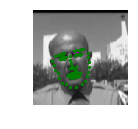

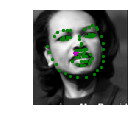

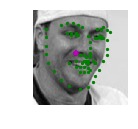

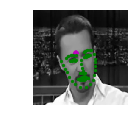

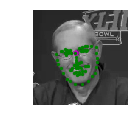

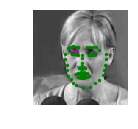

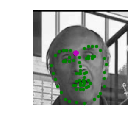

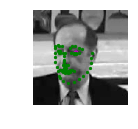

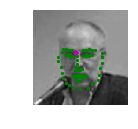

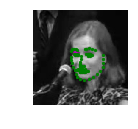

In [12]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [16]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()


optimizer = optim.Adam(net.parameters())


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [17]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9 or batch_i % 10 == 4:    # print every 5 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/5))
                running_loss = 0.0

    print('Finished Training')


In [18]:
# train your network
n_epochs = 30 # start small, and increase when you've decided on your model structure and hyperparams

train_net(n_epochs)

/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 1, Batch: 5, Avg. Loss: 55.05938992500305
Epoch: 1, Batch: 10, Avg. Loss: 5.769820594787598
Epoch: 1, Batch: 15, Avg. Loss: 2.622103786468506
Epoch: 1, Batch: 20, Avg. Loss: 1.4386203169822693
Epoch: 1, Batch: 25, Avg. Loss: 0.6196420878171921
Epoch: 1, Batch: 30, Avg. Loss: 0.39842899441719054
Epoch: 1, Batch: 35, Avg. Loss: 0.2625183969736099
Epoch: 1, Batch: 40, Avg. Loss: 0.21790947020053864
Epoch: 1, Batch: 45, Avg. Loss: 0.2246846616268158
Epoch: 1, Batch: 50, Avg. Loss: 0.2604155600070953
Epoch: 1, Batch: 55, Avg. Loss: 0.2058379203081131


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 2, Batch: 5, Avg. Loss: 0.19537062346935272
Epoch: 2, Batch: 10, Avg. Loss: 0.19612422585487366
Epoch: 2, Batch: 15, Avg. Loss: 0.2353343963623047
Epoch: 2, Batch: 20, Avg. Loss: 0.17481241822242738
Epoch: 2, Batch: 25, Avg. Loss: 0.1650903642177582
Epoch: 2, Batch: 30, Avg. Loss: 0.17954596877098083
Epoch: 2, Batch: 35, Avg. Loss: 0.19775752425193788
Epoch: 2, Batch: 40, Avg. Loss: 0.1804250806570053
Epoch: 2, Batch: 45, Avg. Loss: 0.1970572680234909
Epoch: 2, Batch: 50, Avg. Loss: 0.17706838250160217
Epoch: 2, Batch: 55, Avg. Loss: 0.25029227137565613


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 3, Batch: 5, Avg. Loss: 0.18164641559123992
Epoch: 3, Batch: 10, Avg. Loss: 0.19569455087184906
Epoch: 3, Batch: 15, Avg. Loss: 0.18512177467346191
Epoch: 3, Batch: 20, Avg. Loss: 0.16088459491729737
Epoch: 3, Batch: 25, Avg. Loss: 0.1894369065761566
Epoch: 3, Batch: 30, Avg. Loss: 0.1686317354440689
Epoch: 3, Batch: 35, Avg. Loss: 0.16962586492300033
Epoch: 3, Batch: 40, Avg. Loss: 0.19761927723884581
Epoch: 3, Batch: 45, Avg. Loss: 0.18150458931922914
Epoch: 3, Batch: 50, Avg. Loss: 0.17318263053894042
Epoch: 3, Batch: 55, Avg. Loss: 0.17201012670993804


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 4, Batch: 5, Avg. Loss: 0.17411394119262696
Epoch: 4, Batch: 10, Avg. Loss: 0.18143646121025087
Epoch: 4, Batch: 15, Avg. Loss: 0.2526957869529724
Epoch: 4, Batch: 20, Avg. Loss: 0.1865362197160721
Epoch: 4, Batch: 25, Avg. Loss: 0.18888416290283203
Epoch: 4, Batch: 30, Avg. Loss: 0.17076118290424347
Epoch: 4, Batch: 35, Avg. Loss: 0.20639524161815642
Epoch: 4, Batch: 40, Avg. Loss: 0.17920128107070923
Epoch: 4, Batch: 45, Avg. Loss: 0.20677894353866577
Epoch: 4, Batch: 50, Avg. Loss: 0.207647642493248
Epoch: 4, Batch: 55, Avg. Loss: 0.1686069428920746


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 5, Batch: 5, Avg. Loss: 0.17129821479320526
Epoch: 5, Batch: 10, Avg. Loss: 0.20588022768497466
Epoch: 5, Batch: 15, Avg. Loss: 0.19140850603580475
Epoch: 5, Batch: 20, Avg. Loss: 0.22073236107826233
Epoch: 5, Batch: 25, Avg. Loss: 0.1840004116296768
Epoch: 5, Batch: 30, Avg. Loss: 0.16058742702007295
Epoch: 5, Batch: 35, Avg. Loss: 0.15611238777637482
Epoch: 5, Batch: 40, Avg. Loss: 0.1766309469938278
Epoch: 5, Batch: 45, Avg. Loss: 0.16138915419578553
Epoch: 5, Batch: 50, Avg. Loss: 0.1817580431699753
Epoch: 5, Batch: 55, Avg. Loss: 0.15486128777265548


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 6, Batch: 5, Avg. Loss: 0.15033960938453675
Epoch: 6, Batch: 10, Avg. Loss: 0.17439853847026826
Epoch: 6, Batch: 15, Avg. Loss: 0.1841529756784439
Epoch: 6, Batch: 20, Avg. Loss: 0.1703103631734848
Epoch: 6, Batch: 25, Avg. Loss: 0.1732417732477188
Epoch: 6, Batch: 30, Avg. Loss: 0.1640400171279907
Epoch: 6, Batch: 35, Avg. Loss: 0.19017877280712128
Epoch: 6, Batch: 40, Avg. Loss: 0.15487182140350342
Epoch: 6, Batch: 45, Avg. Loss: 0.1440918892621994
Epoch: 6, Batch: 50, Avg. Loss: 0.202748104929924
Epoch: 6, Batch: 55, Avg. Loss: 0.15878182351589204


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 7, Batch: 5, Avg. Loss: 0.1530358225107193
Epoch: 7, Batch: 10, Avg. Loss: 0.1579085886478424
Epoch: 7, Batch: 15, Avg. Loss: 0.16165069937705995
Epoch: 7, Batch: 20, Avg. Loss: 0.1740731716156006
Epoch: 7, Batch: 25, Avg. Loss: 0.17283311933279039
Epoch: 7, Batch: 30, Avg. Loss: 0.15754161179065704
Epoch: 7, Batch: 35, Avg. Loss: 0.16164571642875672
Epoch: 7, Batch: 40, Avg. Loss: 0.16048555076122284
Epoch: 7, Batch: 45, Avg. Loss: 0.15111448168754577
Epoch: 7, Batch: 50, Avg. Loss: 0.14489272087812424
Epoch: 7, Batch: 55, Avg. Loss: 0.1425676241517067


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 8, Batch: 5, Avg. Loss: 0.1280336543917656
Epoch: 8, Batch: 10, Avg. Loss: 0.14715648740530013
Epoch: 8, Batch: 15, Avg. Loss: 0.15328464061021804
Epoch: 8, Batch: 20, Avg. Loss: 0.16848804652690888
Epoch: 8, Batch: 25, Avg. Loss: 0.12772043347358703
Epoch: 8, Batch: 30, Avg. Loss: 0.15381623804569244
Epoch: 8, Batch: 35, Avg. Loss: 0.14533138275146484
Epoch: 8, Batch: 40, Avg. Loss: 0.14820961952209472
Epoch: 8, Batch: 45, Avg. Loss: 0.1529520720243454
Epoch: 8, Batch: 50, Avg. Loss: 0.13208543211221696
Epoch: 8, Batch: 55, Avg. Loss: 0.14238632023334502


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 9, Batch: 5, Avg. Loss: 0.13278975933790207
Epoch: 9, Batch: 10, Avg. Loss: 0.1937358170747757
Epoch: 9, Batch: 15, Avg. Loss: 0.17537437677383422
Epoch: 9, Batch: 20, Avg. Loss: 0.13446955680847167
Epoch: 9, Batch: 25, Avg. Loss: 0.1465930610895157
Epoch: 9, Batch: 30, Avg. Loss: 0.14096548557281494
Epoch: 9, Batch: 35, Avg. Loss: 0.12971660643815994
Epoch: 9, Batch: 40, Avg. Loss: 0.16531844437122345
Epoch: 9, Batch: 45, Avg. Loss: 0.12191736698150635
Epoch: 9, Batch: 50, Avg. Loss: 0.12697071135044097
Epoch: 9, Batch: 55, Avg. Loss: 0.18922937512397767


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 10, Batch: 5, Avg. Loss: 0.1654604345560074
Epoch: 10, Batch: 10, Avg. Loss: 0.1725172370672226
Epoch: 10, Batch: 15, Avg. Loss: 0.14326434284448625
Epoch: 10, Batch: 20, Avg. Loss: 0.14463447630405427
Epoch: 10, Batch: 25, Avg. Loss: 0.13383014053106307
Epoch: 10, Batch: 30, Avg. Loss: 0.15725308358669282
Epoch: 10, Batch: 35, Avg. Loss: 0.1244029775261879
Epoch: 10, Batch: 40, Avg. Loss: 0.15076165348291398
Epoch: 10, Batch: 45, Avg. Loss: 0.13557742685079574
Epoch: 10, Batch: 50, Avg. Loss: 0.12001945078372955
Epoch: 10, Batch: 55, Avg. Loss: 0.15172311812639236


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 11, Batch: 5, Avg. Loss: 0.1369113191962242
Epoch: 11, Batch: 10, Avg. Loss: 0.16679850220680237
Epoch: 11, Batch: 15, Avg. Loss: 0.14452365189790725
Epoch: 11, Batch: 20, Avg. Loss: 0.12005912512540817
Epoch: 11, Batch: 25, Avg. Loss: 0.1519156813621521
Epoch: 11, Batch: 30, Avg. Loss: 0.11802988201379776
Epoch: 11, Batch: 35, Avg. Loss: 0.1356556683778763
Epoch: 11, Batch: 40, Avg. Loss: 0.15024563521146775
Epoch: 11, Batch: 45, Avg. Loss: 0.13726761788129807
Epoch: 11, Batch: 50, Avg. Loss: 0.11540575325489044
Epoch: 11, Batch: 55, Avg. Loss: 0.17066219747066497


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 12, Batch: 5, Avg. Loss: 0.11250628232955932
Epoch: 12, Batch: 10, Avg. Loss: 0.1428038850426674
Epoch: 12, Batch: 15, Avg. Loss: 0.1439626172184944
Epoch: 12, Batch: 20, Avg. Loss: 0.12434472888708115
Epoch: 12, Batch: 25, Avg. Loss: 0.18025336265563965
Epoch: 12, Batch: 30, Avg. Loss: 0.13200762271881103
Epoch: 12, Batch: 35, Avg. Loss: 0.14755179733037949
Epoch: 12, Batch: 40, Avg. Loss: 0.13831671625375747
Epoch: 12, Batch: 45, Avg. Loss: 0.127021162211895
Epoch: 12, Batch: 50, Avg. Loss: 0.11570093333721161
Epoch: 12, Batch: 55, Avg. Loss: 0.19854944497346877


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 13, Batch: 5, Avg. Loss: 0.12566699087619781
Epoch: 13, Batch: 10, Avg. Loss: 0.11681530326604843
Epoch: 13, Batch: 15, Avg. Loss: 0.12896404266357422
Epoch: 13, Batch: 20, Avg. Loss: 0.1410653918981552
Epoch: 13, Batch: 25, Avg. Loss: 0.15003557056188582
Epoch: 13, Batch: 30, Avg. Loss: 0.1186295598745346
Epoch: 13, Batch: 35, Avg. Loss: 0.13033081740140914
Epoch: 13, Batch: 40, Avg. Loss: 0.11971850842237472
Epoch: 13, Batch: 45, Avg. Loss: 0.10663089752197266
Epoch: 13, Batch: 50, Avg. Loss: 0.11257482469081878
Epoch: 13, Batch: 55, Avg. Loss: 0.12380693703889847


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 14, Batch: 5, Avg. Loss: 0.1183225005865097
Epoch: 14, Batch: 10, Avg. Loss: 0.10486511737108231
Epoch: 14, Batch: 15, Avg. Loss: 0.12213584184646606
Epoch: 14, Batch: 20, Avg. Loss: 0.10419762581586837
Epoch: 14, Batch: 25, Avg. Loss: 0.09957317858934403
Epoch: 14, Batch: 30, Avg. Loss: 0.11003697216510773
Epoch: 14, Batch: 35, Avg. Loss: 0.11769122630357742
Epoch: 14, Batch: 40, Avg. Loss: 0.10517456233501435
Epoch: 14, Batch: 45, Avg. Loss: 0.1138700395822525
Epoch: 14, Batch: 50, Avg. Loss: 0.08772465437650681
Epoch: 14, Batch: 55, Avg. Loss: 0.09448272585868836


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 15, Batch: 5, Avg. Loss: 0.09602995663881302
Epoch: 15, Batch: 10, Avg. Loss: 0.09538958966732025
Epoch: 15, Batch: 15, Avg. Loss: 0.11874569952487946
Epoch: 15, Batch: 20, Avg. Loss: 0.09751968383789063
Epoch: 15, Batch: 25, Avg. Loss: 0.0788511648774147
Epoch: 15, Batch: 30, Avg. Loss: 0.08281127661466599
Epoch: 15, Batch: 35, Avg. Loss: 0.10999725461006164
Epoch: 15, Batch: 40, Avg. Loss: 0.10841252207756043
Epoch: 15, Batch: 45, Avg. Loss: 0.10218397229909897
Epoch: 15, Batch: 50, Avg. Loss: 0.09031537026166916
Epoch: 15, Batch: 55, Avg. Loss: 0.1528603881597519


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 16, Batch: 5, Avg. Loss: 0.10587028861045837
Epoch: 16, Batch: 10, Avg. Loss: 0.08965027183294297
Epoch: 16, Batch: 15, Avg. Loss: 0.10936838388442993
Epoch: 16, Batch: 20, Avg. Loss: 0.08018448203802109
Epoch: 16, Batch: 25, Avg. Loss: 0.10160589665174484
Epoch: 16, Batch: 30, Avg. Loss: 0.09003924429416657
Epoch: 16, Batch: 35, Avg. Loss: 0.1196454182267189
Epoch: 16, Batch: 40, Avg. Loss: 0.09806511253118515
Epoch: 16, Batch: 45, Avg. Loss: 0.08860407620668412
Epoch: 16, Batch: 50, Avg. Loss: 0.09266285598278046
Epoch: 16, Batch: 55, Avg. Loss: 0.11903378665447235


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 17, Batch: 5, Avg. Loss: 0.09745873659849166
Epoch: 17, Batch: 10, Avg. Loss: 0.1045309215784073
Epoch: 17, Batch: 15, Avg. Loss: 0.09551302939653397
Epoch: 17, Batch: 20, Avg. Loss: 0.0780419021844864
Epoch: 17, Batch: 25, Avg. Loss: 0.11936673372983933
Epoch: 17, Batch: 30, Avg. Loss: 0.07584770992398263
Epoch: 17, Batch: 35, Avg. Loss: 0.10681875050067902
Epoch: 17, Batch: 40, Avg. Loss: 0.10392442494630813
Epoch: 17, Batch: 45, Avg. Loss: 0.0988122656941414
Epoch: 17, Batch: 50, Avg. Loss: 0.09080673158168792
Epoch: 17, Batch: 55, Avg. Loss: 0.07879093140363694


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 18, Batch: 5, Avg. Loss: 0.08298968225717544
Epoch: 18, Batch: 10, Avg. Loss: 0.08888246938586235
Epoch: 18, Batch: 15, Avg. Loss: 0.09964094012975692
Epoch: 18, Batch: 20, Avg. Loss: 0.07419198006391525
Epoch: 18, Batch: 25, Avg. Loss: 0.07560150474309921
Epoch: 18, Batch: 30, Avg. Loss: 0.09266058057546615
Epoch: 18, Batch: 35, Avg. Loss: 0.1102943778038025
Epoch: 18, Batch: 40, Avg. Loss: 0.10184363424777984
Epoch: 18, Batch: 45, Avg. Loss: 0.08696081638336181
Epoch: 18, Batch: 50, Avg. Loss: 0.08338537812232971
Epoch: 18, Batch: 55, Avg. Loss: 0.07648402750492096


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 19, Batch: 5, Avg. Loss: 0.07380181178450584
Epoch: 19, Batch: 10, Avg. Loss: 0.09321068227291107
Epoch: 19, Batch: 15, Avg. Loss: 0.10422215461730958
Epoch: 19, Batch: 20, Avg. Loss: 0.07679669260978698
Epoch: 19, Batch: 25, Avg. Loss: 0.08351818397641182
Epoch: 19, Batch: 30, Avg. Loss: 0.07978704199194908
Epoch: 19, Batch: 35, Avg. Loss: 0.08178772032260895
Epoch: 19, Batch: 40, Avg. Loss: 0.07225964963436127
Epoch: 19, Batch: 45, Avg. Loss: 0.08125000149011612
Epoch: 19, Batch: 50, Avg. Loss: 0.0781586341559887
Epoch: 19, Batch: 55, Avg. Loss: 0.11190881133079529


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 20, Batch: 5, Avg. Loss: 0.07149313688278199
Epoch: 20, Batch: 10, Avg. Loss: 0.1252138704061508
Epoch: 20, Batch: 15, Avg. Loss: 0.08995429426431656
Epoch: 20, Batch: 20, Avg. Loss: 0.07289907038211822
Epoch: 20, Batch: 25, Avg. Loss: 0.10247485786676407
Epoch: 20, Batch: 30, Avg. Loss: 0.07628008201718331
Epoch: 20, Batch: 35, Avg. Loss: 0.0729365512728691
Epoch: 20, Batch: 40, Avg. Loss: 0.07148244231939316
Epoch: 20, Batch: 45, Avg. Loss: 0.0786328949034214
Epoch: 20, Batch: 50, Avg. Loss: 0.07701893597841263
Epoch: 20, Batch: 55, Avg. Loss: 0.11039388030767441


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 21, Batch: 5, Avg. Loss: 0.06994281932711602
Epoch: 21, Batch: 10, Avg. Loss: 0.0761924758553505
Epoch: 21, Batch: 15, Avg. Loss: 0.07081971019506454
Epoch: 21, Batch: 20, Avg. Loss: 0.06013525277376175
Epoch: 21, Batch: 25, Avg. Loss: 0.09524404406547546
Epoch: 21, Batch: 30, Avg. Loss: 0.07076685726642609
Epoch: 21, Batch: 35, Avg. Loss: 0.08062168061733246
Epoch: 21, Batch: 40, Avg. Loss: 0.06917688623070717
Epoch: 21, Batch: 45, Avg. Loss: 0.07812099680304527
Epoch: 21, Batch: 50, Avg. Loss: 0.09557406082749367
Epoch: 21, Batch: 55, Avg. Loss: 0.07865984067320823


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 22, Batch: 5, Avg. Loss: 0.07475343346595764
Epoch: 22, Batch: 10, Avg. Loss: 0.07169385477900506
Epoch: 22, Batch: 15, Avg. Loss: 0.06628738567233086
Epoch: 22, Batch: 20, Avg. Loss: 0.07970423623919487
Epoch: 22, Batch: 25, Avg. Loss: 0.07019044011831284
Epoch: 22, Batch: 30, Avg. Loss: 0.08844052776694297
Epoch: 22, Batch: 35, Avg. Loss: 0.08549169898033142
Epoch: 22, Batch: 40, Avg. Loss: 0.07325945049524307
Epoch: 22, Batch: 45, Avg. Loss: 0.0730935700237751
Epoch: 22, Batch: 50, Avg. Loss: 0.08776608407497406
Epoch: 22, Batch: 55, Avg. Loss: 0.08385867103934289


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 23, Batch: 5, Avg. Loss: 0.09588959887623787
Epoch: 23, Batch: 10, Avg. Loss: 0.0629497766494751
Epoch: 23, Batch: 15, Avg. Loss: 0.08975734263658523
Epoch: 23, Batch: 20, Avg. Loss: 0.06989811360836029
Epoch: 23, Batch: 25, Avg. Loss: 0.06611831709742547
Epoch: 23, Batch: 30, Avg. Loss: 0.09027350544929505
Epoch: 23, Batch: 35, Avg. Loss: 0.06476523652672768
Epoch: 23, Batch: 40, Avg. Loss: 0.08590233847498893
Epoch: 23, Batch: 45, Avg. Loss: 0.11215349435806274
Epoch: 23, Batch: 50, Avg. Loss: 0.10497984513640404
Epoch: 23, Batch: 55, Avg. Loss: 0.06878177747130394


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 24, Batch: 5, Avg. Loss: 0.0910057082772255
Epoch: 24, Batch: 10, Avg. Loss: 0.07188617587089538
Epoch: 24, Batch: 15, Avg. Loss: 0.06752786412835121
Epoch: 24, Batch: 20, Avg. Loss: 0.0676187440752983
Epoch: 24, Batch: 25, Avg. Loss: 0.10840271487832069
Epoch: 24, Batch: 30, Avg. Loss: 0.07224405854940415
Epoch: 24, Batch: 35, Avg. Loss: 0.076680476218462
Epoch: 24, Batch: 40, Avg. Loss: 0.09076758697628975
Epoch: 24, Batch: 45, Avg. Loss: 0.06353363543748855
Epoch: 24, Batch: 50, Avg. Loss: 0.07957551032304763
Epoch: 24, Batch: 55, Avg. Loss: 0.07720428556203843


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 25, Batch: 5, Avg. Loss: 0.06132220253348351
Epoch: 25, Batch: 10, Avg. Loss: 0.07896110862493515
Epoch: 25, Batch: 15, Avg. Loss: 0.07763205543160438
Epoch: 25, Batch: 20, Avg. Loss: 0.07179420217871665
Epoch: 25, Batch: 25, Avg. Loss: 0.067549579590559
Epoch: 25, Batch: 30, Avg. Loss: 0.0671926572918892
Epoch: 25, Batch: 35, Avg. Loss: 0.06698822006583213
Epoch: 25, Batch: 40, Avg. Loss: 0.06949456855654716
Epoch: 25, Batch: 45, Avg. Loss: 0.08065967336297035
Epoch: 25, Batch: 50, Avg. Loss: 0.07030014097690582
Epoch: 25, Batch: 55, Avg. Loss: 0.05851406082510948


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 26, Batch: 5, Avg. Loss: 0.050568541139364244
Epoch: 26, Batch: 10, Avg. Loss: 0.08976949527859687
Epoch: 26, Batch: 15, Avg. Loss: 0.0749877706170082
Epoch: 26, Batch: 20, Avg. Loss: 0.12377746552228927
Epoch: 26, Batch: 25, Avg. Loss: 0.07271633446216583
Epoch: 26, Batch: 30, Avg. Loss: 0.11213062107563018
Epoch: 26, Batch: 35, Avg. Loss: 0.07001985758543014
Epoch: 26, Batch: 40, Avg. Loss: 0.08637415394186973
Epoch: 26, Batch: 45, Avg. Loss: 0.06252227649092675
Epoch: 26, Batch: 50, Avg. Loss: 0.06889331564307213
Epoch: 26, Batch: 55, Avg. Loss: 0.06811824962496757


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 27, Batch: 5, Avg. Loss: 0.06629900783300399
Epoch: 27, Batch: 10, Avg. Loss: 0.07450434863567353
Epoch: 27, Batch: 15, Avg. Loss: 0.06604679971933365
Epoch: 27, Batch: 20, Avg. Loss: 0.06616568565368652
Epoch: 27, Batch: 25, Avg. Loss: 0.06822106316685676
Epoch: 27, Batch: 30, Avg. Loss: 0.06486240848898887
Epoch: 27, Batch: 35, Avg. Loss: 0.09534258767962456
Epoch: 27, Batch: 40, Avg. Loss: 0.0741637296974659
Epoch: 27, Batch: 45, Avg. Loss: 0.08836656212806701
Epoch: 27, Batch: 50, Avg. Loss: 0.07485772743821144
Epoch: 27, Batch: 55, Avg. Loss: 0.07142332419753075


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 28, Batch: 5, Avg. Loss: 0.0677585817873478
Epoch: 28, Batch: 10, Avg. Loss: 0.06613147854804993
Epoch: 28, Batch: 15, Avg. Loss: 0.11295538246631623
Epoch: 28, Batch: 20, Avg. Loss: 0.06360770091414451
Epoch: 28, Batch: 25, Avg. Loss: 0.06774616986513138
Epoch: 28, Batch: 30, Avg. Loss: 0.05598426014184952
Epoch: 28, Batch: 35, Avg. Loss: 0.06832366362214089
Epoch: 28, Batch: 40, Avg. Loss: 0.05953724756836891
Epoch: 28, Batch: 45, Avg. Loss: 0.06769314929842948
Epoch: 28, Batch: 50, Avg. Loss: 0.07847422659397126
Epoch: 28, Batch: 55, Avg. Loss: 0.06689399406313896


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 29, Batch: 5, Avg. Loss: 0.054389151930809024
Epoch: 29, Batch: 10, Avg. Loss: 0.06087229996919632
Epoch: 29, Batch: 15, Avg. Loss: 0.06457257121801377
Epoch: 29, Batch: 20, Avg. Loss: 0.06506699100136756
Epoch: 29, Batch: 25, Avg. Loss: 0.07372917458415032
Epoch: 29, Batch: 30, Avg. Loss: 0.0640538215637207
Epoch: 29, Batch: 35, Avg. Loss: 0.12338082641363143
Epoch: 29, Batch: 40, Avg. Loss: 0.08304274901747703
Epoch: 29, Batch: 45, Avg. Loss: 0.06361881569027901
Epoch: 29, Batch: 50, Avg. Loss: 0.06686484068632126
Epoch: 29, Batch: 55, Avg. Loss: 0.06796621084213257


/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

Epoch: 30, Batch: 5, Avg. Loss: 0.0719456434249878
Epoch: 30, Batch: 10, Avg. Loss: 0.0652148112654686
Epoch: 30, Batch: 15, Avg. Loss: 0.08143910691142082
Epoch: 30, Batch: 20, Avg. Loss: 0.07550114318728447
Epoch: 30, Batch: 25, Avg. Loss: 0.057883258908987045
Epoch: 30, Batch: 30, Avg. Loss: 0.07525594308972358
Epoch: 30, Batch: 35, Avg. Loss: 0.06289482861757278
Epoch: 30, Batch: 40, Avg. Loss: 0.06085746660828591
Epoch: 30, Batch: 45, Avg. Loss: 0.060158290714025495
Epoch: 30, Batch: 50, Avg. Loss: 0.06484659612178803
Epoch: 30, Batch: 55, Avg. Loss: 0.05336955189704895
Finished Training


## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [20]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/media/lety/ddabaf05-70b2-4e5c-b833-30c9599b90331/workspace/Computer-Vision-Udacity/P1_Facial_Keypoints-master/data_load.py:39: FutureWarning: Method .as_matrix will be rem

torch.Size([64, 1, 224, 224])
torch.Size([64, 68, 2])
torch.Size([64, 68, 2])


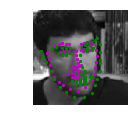

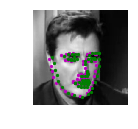

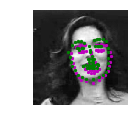

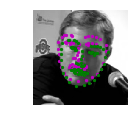

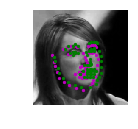

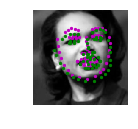

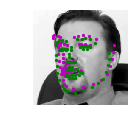

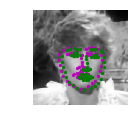

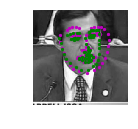

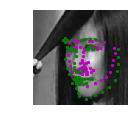

In [21]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)



Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [19]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_30_adam_64_drop_0_07.pt'
# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: I used **Adam** optimizer. Adam is similar to RMSProp but it adds momentum. It computes an adaptive learning rate for each parameter. I've also tried Adagrad that also calculates the learning rate based on past gradients. I didn't get good results using Adagrad. I should try Adadelta that fix Adagrad problems. 

About the loss function, I used MSE loss. It's used for linear regression and in this is a linear regression problem. It's calculate the average distance of each predition and the expected result. I see it very simple and with good results. 

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I used a CNN with 4 convolutional layers and dropout for preventing overfitting. I started with 2 layers but the results weren't so good. So I added 2 more layers. I also tried to slowly converge to the output using two fully connected layers at the end. I made some experiments with Batch Normalization, but I couldn't get the results expected so I ended not using it. 

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: In the Udacity Workspace, the batch_size was fixed in 10. I decided to move to my computer and increase the batch_size. That tooks a lot of memory resources and CPU computation (the project is not available in GPU). I could increase the batch_size to 64 and the results were good, so I sticked to that value.

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.11596441  0.10109261  0.05092475  0.16304177]
 [-0.04416099  0.08769819 -0.15745229  0.21340165]
 [-0.05873668 -0.10338953 -0.0430963  -0.1680114 ]
 [ 0.11732611 -0.20232898  0.17646995 -0.06983784]]
(4, 4)


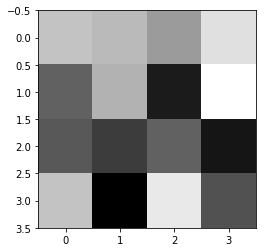

In [13]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

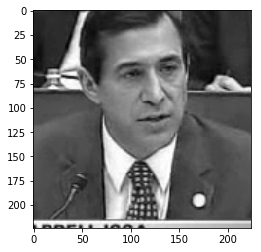

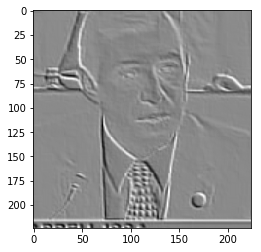

In [22]:
##TODO: load in and display any image from the transformed test dataset

## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

##TODO: load in and display any image from the test dataset
from random import randint
import cv2
i = randint(0,len(test_images)-1)
image = test_images[i].data
image = image.numpy()
image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image
image = image.reshape(224,224)
plt.imshow(image, cmap='gray')
plt.show()
## TODO: use cv's filter2D function 
# apply a specific set of filter weights (like the one displayed above) to the test image
weights1 = net.conv1.weight.data
weights2 = net.conv2.weight.data
weights3 = net.conv3.weight.data
weights4 = net.conv4.weight.data

w1 = weights1.numpy()
w2 = weights2.numpy()
w3 = weights3.numpy()
w4 = weights4.numpy()

filter_index = 0

kernel1 = w1[filter_index][0]
kernel2 = w2[filter_index][0]
kernel3 = w3[filter_index][0]
kernel4 = w4[filter_index][0]

dst = image
dst = cv2.filter2D(dst,-1,kernel2)
#dst = cv2.filter2D(dst,-1,kernel2)
#dst = cv2.filter2D(dst,-1,kernel3)
#dst = cv2.filter2D(dst,-1,kernel4)
plt.imshow(dst, cmap='gray')
plt.show()


### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: The filter seems to be detecting big changes in color. It could be used for detecting edges.

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!